<a href="https://colab.research.google.com/github/Pogayo/Machine-Learning/blob/master/Israel_unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import io

In [0]:
uploaded=files.upload();

Saving unemployment.csv to unemployment (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

In [0]:
dataset=pd.read_csv(io.BytesIO(uploaded["unemployment.csv"]), parse_dates=["Date"], index_col="Date")

In [0]:
dataset=dataset.sort_values(by="Date")

In [0]:
dataset.head()

,Value
Date,
1980-12-31,4.780
1981-12-31,5.115
1982-12-31,5.048
1983-12-31,4.562
1984-12-31,5.893


In [0]:
future=dataset.loc['2020-03-01':]
dataset=dataset.loc[:'2020-02-29']


In [0]:
future.tail()

,Value
Date,
2020-12-31,3.974
2021-12-31,4.106
2022-12-31,4.144
2023-12-31,4.153
2024-12-31,4.162


In [0]:
dataset.tail()

,Value
Date,
2015-12-31,5.275
2016-12-31,4.775
2017-12-31,4.250
2018-12-31,3.984
2019-12-31,3.974


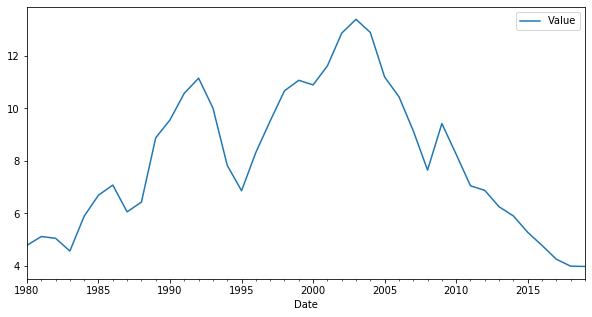

In [0]:
dataset.plot(kind="line", figsize=(10,5))

In [0]:
dataset.describe()

,Value
count,40.000000
mean,8.057650
std,2.721063
min,3.974000
25%,5.898250
50%,7.739000
75%,10.483750
max,13.400000


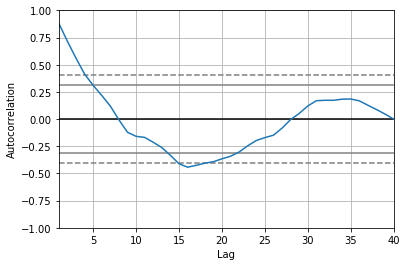

In [0]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataset)
plt.show()

predicted=7.538921, expected=6.875000
predicted=6.295616, expected=6.250000
predicted=6.557382, expected=5.900000
predicted=6.040309, expected=5.275000
predicted=4.868459, expected=4.775000
predicted=4.777982, expected=4.250000
predicted=4.020333, expected=3.984000
predicted=3.990339, expected=3.974000
Test Mean Squared Error: 0.219
Test Mean Absolute Error: 0.351


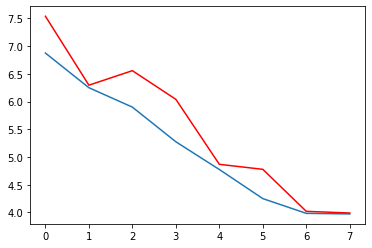

In [0]:
#Buidling a model and evaluating it
X = dataset.values
size = int(len(X) * 0.8) # trainset of 80% and test set of 20%
train, test = X[0:size], X[size:len(X)]
history = [x for x in train] #flattening
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	pred_value = output[0]
	predictions.append(	pred_value)
	actual_value = test[t]
	history.append(actual_value)
	print('predicted=%f, expected=%f' % (	pred_value, actual_value))
mse= mean_squared_error(test, predictions) #calculating accuracy
mae=mean_absolute_error(test, predictions)
print('Test Mean Squared Error: %.3f' % mse)
print('Test Mean Absolute Error: %.3f' % mae)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [0]:
#mean absolute percentage error MAPE
sum_error=0
for i in range(len(test)):
  error=np.abs((test[i]-predictions[i])/test[i])
  sum_error=sum_error+error
mape=(sum_error/len(test))*100
print('MAPE : %.3f' % mape)

MAPE : 6.468


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   39
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -52.535
Method:                       css-mle   S.D. of innovations              0.926
Date:                Sun, 08 Mar 2020   AIC                            119.070
Time:                        11:13:37   BIC                            130.715
Sample:                    12-31-1981   HQIC                           123.248
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0185      0.203     -0.091      0.928      -0.417       0.380
ar.L1.D.Value     0.4331      0.156      2.774      0.009       0.127       0.739
ar.L2.D.Value    -0.2317      0.167     

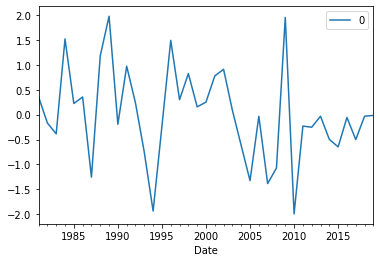

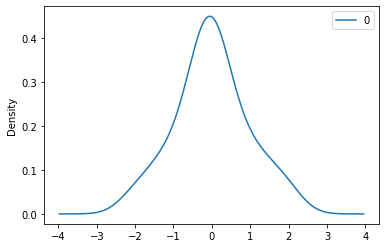

               0
count  39.000000
mean   -0.002223
std     0.939849
min    -1.992194
25%    -0.498872
50%    -0.033068
75%     0.353450
max     1.973071


In [0]:
# fit model
model = ARIMA(dataset, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals =pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [0]:
#predicting for 2020
print(model_fit.forecast())

(array([3.95521725]), array([0.9257076]), array([[2.1408637 , 5.76957081]]))


In [0]:
#predicting for next four years

print(model_fit.forecast(4)[0])

[3.95521725 3.93275346 3.88380532 3.8104581 ]


In [0]:
print(model_fit.predict(start=40, end=44,typ="levels")) #type set to levels to undo the differerencing our d=1

2020-12-31    3.955217
2021-12-31    3.932753
2022-12-31    3.883805
2023-12-31    3.810458
2024-12-31    3.776208
Freq: A-DEC, dtype: float64


In [0]:
#comparing with the predictions from QUANDL 
print(future)

            Value
Date             
2020-12-31  3.974
2021-12-31  4.106
2022-12-31  4.144
2023-12-31  4.153
2024-12-31  4.162


-4.213346322454945